# CV-01

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 设置 Matplotlib 图像显示方式
%matplotlib inline

## 创建空白画布

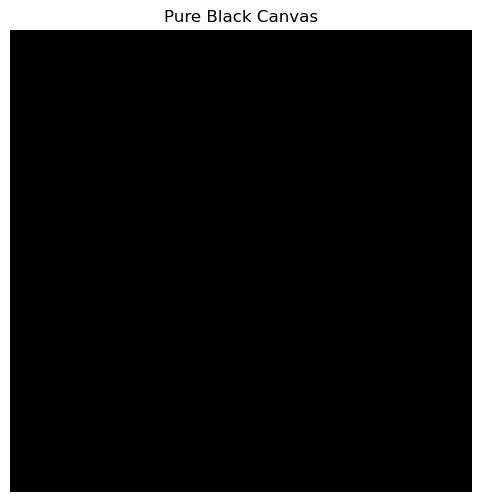

In [4]:
# 定义画布尺寸
width = 500
height = 500
# 创建一个纯黑色的 500x500 图像（3个通道，8位无符号整数）
# 注意：OpenCV 使用 BGR 颜色顺序
black_img = np.zeros((height, width, 3), np.uint8)

# 纯白画布
white_img = np.ones((height, width, 3), np.uint8) * 255 

# 纯蓝色画布
blue_img = np.zeros((height, width, 3), np.uint8)
# 设置所有像素的蓝色通道值为 255
blue_img[:, :] = (255, 0, 0) # BGR: Blue=255, Green=0, Red=0

# 显示画布（使用 Matplotlib）
def display_img(img, title="Image"):
    # OpenCV 使用 BGR，Matplotlib 使用 RGB，因此需要转换
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off') # 不显示坐标轴
    plt.show()

display_img(black_img.copy(), "Pure Black Canvas")

In [5]:
blank_canvas = np.zeros((height, width, 3), np.uint8)

## 基本绘图操作

### 直线 `line()`

In [6]:
# 定义起点和终点
pt1 = (50, 50)
pt2 = (450, 50)
# 颜色：绿色 (0, 255, 0)
color = (0, 255, 0)
# 粗细：5 像素
thickness = 5

cv2.line(blank_canvas, pt1, pt2, color, thickness)

# 绘制一条对角线
cv2.line(blank_canvas, (0, 0), (width, height), (0, 0, 255), 2) # 红色，粗细 2

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

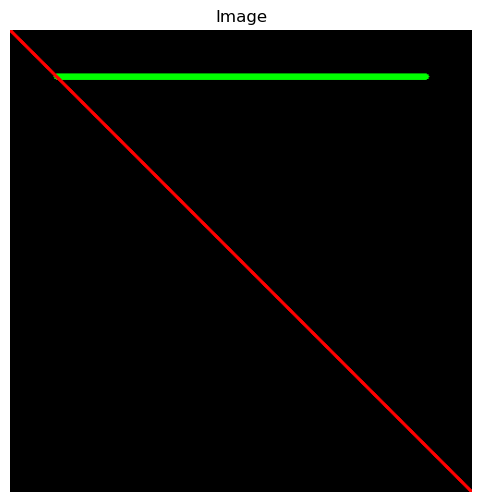

In [8]:
display_img(blank_canvas)

### 矩形 `rectangle()`

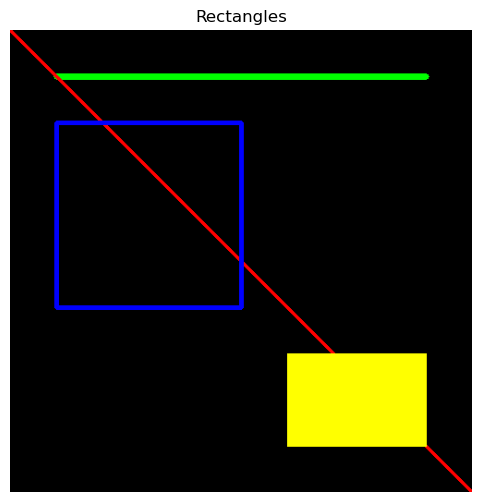

In [9]:
# 复制画布，在新画布上绘制
canvas_rect = blank_canvas.copy()

# 绘制一个空心矩形
top_left = (50, 100)
bottom_right = (250, 300)
# 颜色：蓝色 (255, 0, 0)
color = (255, 0, 0)
thickness = 3 # 3像素粗细

cv2.rectangle(canvas_rect, top_left, bottom_right, color, thickness)

# 绘制一个填充矩形
top_left_fill = (300, 350)
bottom_right_fill = (450, 450)
# 颜色：黄色 (0, 255, 255)
color_fill = (0, 255, 255)
thickness_fill = -1 # 填充

cv2.rectangle(canvas_rect, top_left_fill, bottom_right_fill, color_fill, thickness_fill)

display_img(canvas_rect, "Rectangles")

### 圆 `circle()`

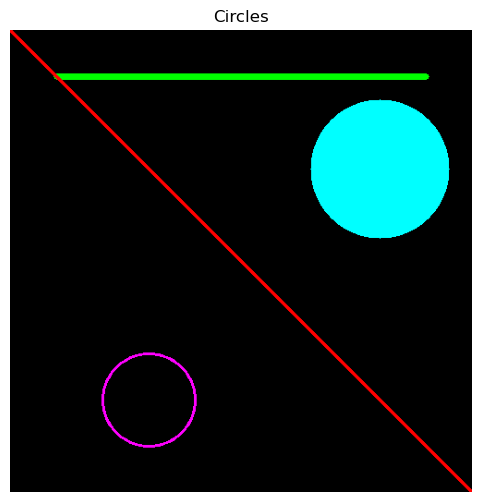

In [10]:
# 复制画布，在新画布上绘制
canvas_circle = blank_canvas.copy()

# 绘制一个空心圆
center_empty = (150, 400)
radius_empty = 50
# 颜色：品红色 (255, 0, 255)
color_empty = (255, 0, 255)
thickness_empty = 2

cv2.circle(canvas_circle, center_empty, radius_empty, color_empty, thickness_empty)

# 绘制一个填充圆
center_fill = (400, 150)
radius_fill = 75
# 颜色：青色 (255, 255, 0)
color_fill = (255, 255, 0)
thickness_fill = -1 # 填充

cv2.circle(canvas_circle, center_fill, radius_fill, color_fill, thickness_fill)

display_img(canvas_circle, "Circles")

### 文本 `putText()`

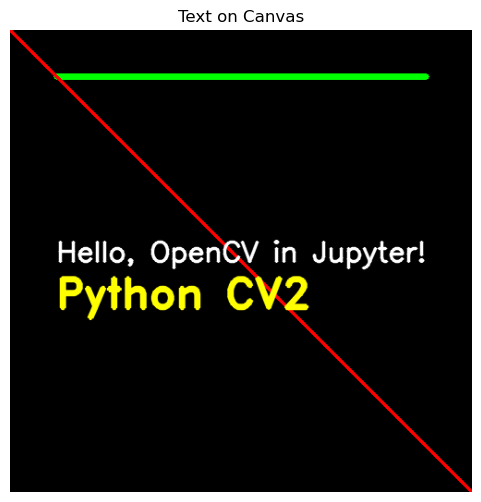

In [11]:
# 复制画布，在新画布上绘制
canvas_text = blank_canvas.copy()

# 文本内容
text = "Hello, OpenCV in Jupyter!"
# 左下角起始坐标
org = (50, 250)
# 字体
font = cv2.FONT_HERSHEY_SIMPLEX # 常用字体之一
# 字体大小比例
font_scale = 1
# 颜色：白色 (255, 255, 255)
color = (255, 255, 255)
# 粗细
thickness = 2
# 可选：线条类型（抗锯齿等）
line_type = cv2.LINE_AA 

cv2.putText(canvas_text, text, org, font, font_scale, color, thickness, line_type)

# 绘制另一行文本
cv2.putText(canvas_text, "Python CV2", (50, 300), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 255, 255), 3, cv2.LINE_AA)

display_img(canvas_text, "Text on Canvas")

## 绘制笑脸

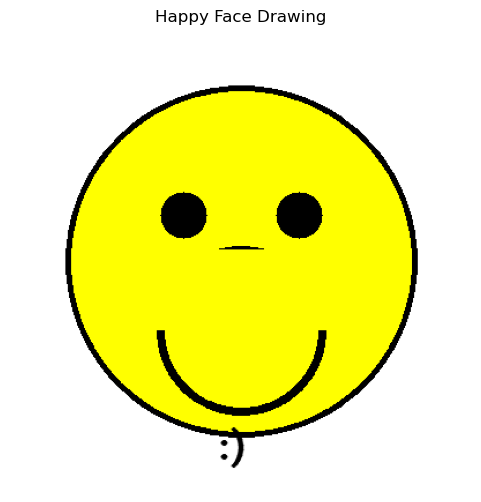

In [12]:
# 创建一个新的白色画布
smile_canvas = np.ones((400, 400, 3), np.uint8) * 255
center_x, center_y = 200, 200

# 1. 绘制脸部 (填充黄色圆)
cv2.circle(smile_canvas, (center_x, center_y), 150, (0, 255, 255), -1) 
# 2. 绘制脸部轮廓 (黑色)
cv2.circle(smile_canvas, (center_x, center_y), 150, (0, 0, 0), 3)

# 3. 绘制左眼 (填充黑色圆)
cv2.circle(smile_canvas, (center_x - 50, center_y - 40), 20, (0, 0, 0), -1) 
# 4. 绘制右眼 (填充黑色圆)
cv2.circle(smile_canvas, (center_x + 50, center_y - 40), 20, (0, 0, 0), -1)

# 5. 绘制嘴巴 (使用曲线，这里简化为圆形的一部分或直线，OpenCV没有简单的弧线函数，用直线/圆代替)
# 绘制一个开口向上的弧线（在 OpenCV 中绘制弧线复杂，这里用半圆形代替）
# 我们绘制一个圆，然后用一个填充矩形盖住上半部分
mouth_center = (center_x, center_y + 60)
cv2.circle(smile_canvas, mouth_center, 70, (0, 0, 0), 5) # 黑色圆作为嘴巴轮廓

# 用黄色矩形覆盖圆的上半部分，形成微笑的弧线
# 从嘴巴中心上方 1 像素开始，向上画一个黄色填充矩形
cover_start = (mouth_center[0] - 75, mouth_center[1] - 70) 
cover_end = (mouth_center[0] + 75, mouth_center[1] - 1)
cv2.rectangle(smile_canvas, cover_start, cover_end, (0, 255, 255), -1)

# 6. 添加文本
cv2.putText(smile_canvas, ":)", (center_x - 20, center_y + 170), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

display_img(smile_canvas, "Happy Face Drawing")

## 保存图像

In [13]:
# 将笑脸图像保存为 PNG 文件
output_path = "happy_face.png"
success = cv2.imwrite(output_path, smile_canvas)

if success:
    print(f"图像已成功保存到: {output_path}")
else:
    print("图像保存失败。")

图像已成功保存到: happy_face.png
